EDA1 assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/sample_data/Cardiotocographic.csv')
print(f"Shape: {df.shape}")
print(df.head())

Shape: (2126, 14)
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [3]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [4]:
df = df.dropna(subset=['NSP'])
df['NSP'] = df['NSP'].astype('category')

In [5]:
print("\nDataset info:")
print(df.info())
print("\nBasic stats:")
print(df.describe().round(2))


Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LB        2105 non-null   float64 
 1   AC        2105 non-null   float64 
 2   FM        2105 non-null   float64 
 3   UC        2105 non-null   float64 
 4   DL        2105 non-null   float64 
 5   DS        2105 non-null   float64 
 6   DP        2105 non-null   float64 
 7   ASTV      2105 non-null   float64 
 8   MSTV      2105 non-null   float64 
 9   ALTV      2105 non-null   float64 
 10  MLTV      2105 non-null   float64 
 11  Width     2105 non-null   float64 
 12  Tendency  2105 non-null   float64 
 13  NSP       2105 non-null   category
dtypes: category(1), float64(13)
memory usage: 237.2 KB
None

Basic stats:
            LB       AC       FM       UC       DL      DS       DP     ASTV  \
count  2105.00  2105.00  2105.00  2105.00  2105.00  2105.0  2105.00  2105.00   
mean    

In [6]:
print("\nNSP distribution:")
print(df['NSP'].value_counts(normalize=True)*100)


NSP distribution:
NSP
 1.000000    73.444181
 2.000000    13.301663
 3.000000     7.790974
-1.000000     0.237530
 5.000000     0.190024
               ...    
 3.007324     0.047506
 3.015185     0.047506
 3.019152     0.047506
 3.020038     0.047506
 3.034545     0.047506
Name: proportion, Length: 111, dtype: float64


Text(0.5, 0.98, 'CardioToco Distributions')

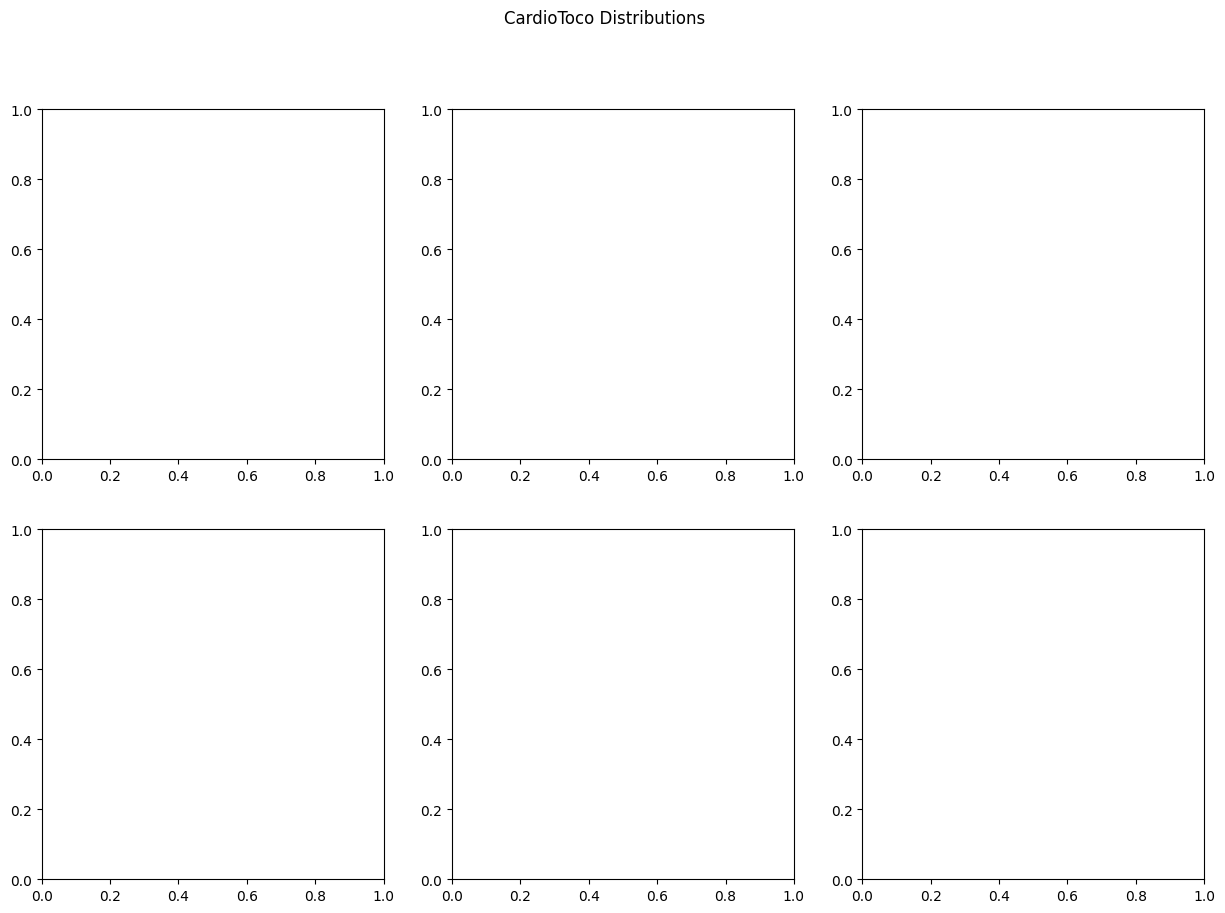

In [7]:
# plots
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('CardioToco Distributions')

In [8]:
vars = ['LB', 'AC', 'FM', 'ASTV', 'MSTV', 'ALTV']
for i, var in enumerate(vars):
    row, col = i//3, i%3
    if var == 'NSP':
        df[var].value_counts().plot(kind='bar', ax=axes[row,col])
    else:
        axes[row,col].hist(df[var].dropna(), bins=30, alpha=0.7)
    axes[row,col].set_title(var)

In [9]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

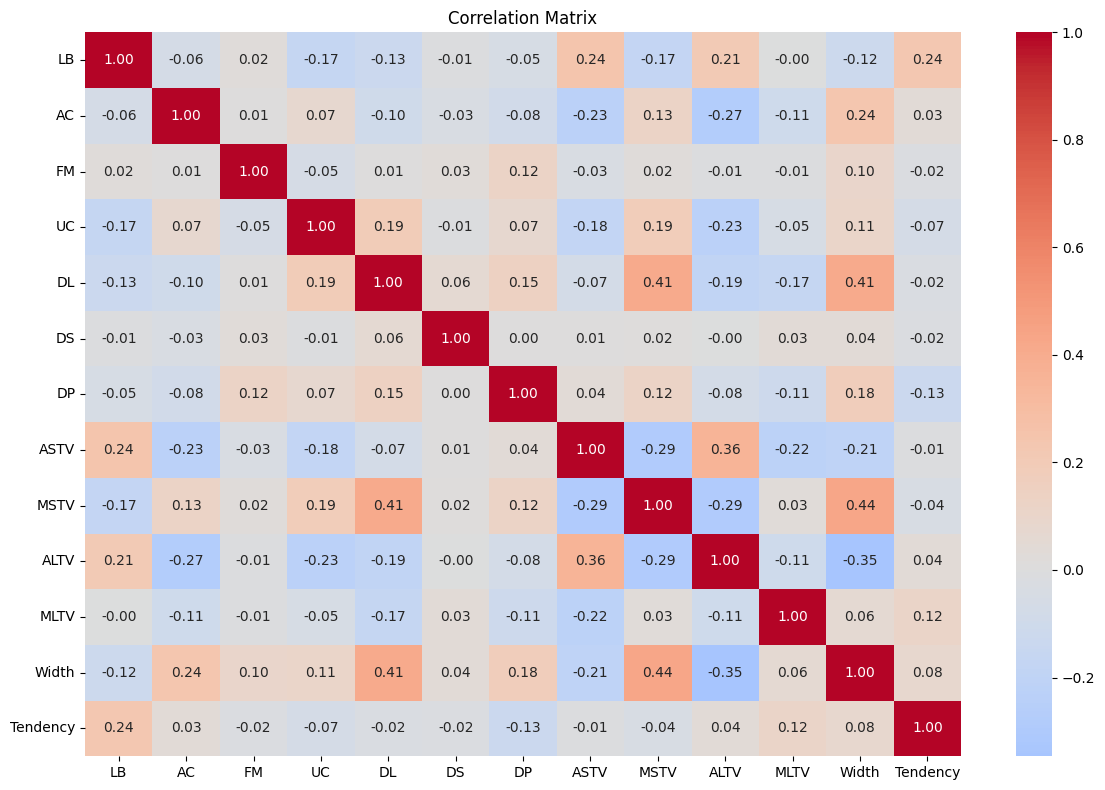

In [10]:
# correlation
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

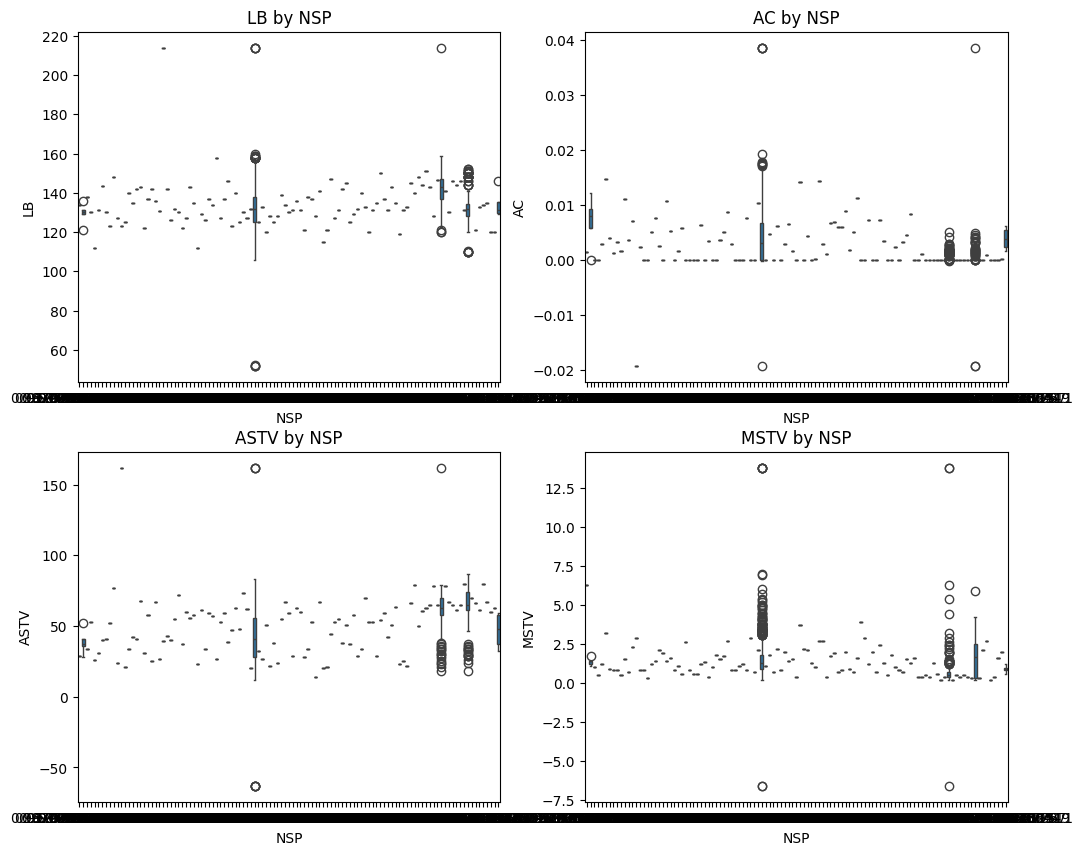

In [14]:
#boxplots by NSP
key_feats = ['LB', 'AC', 'ASTV', 'MSTV']
fig, axes = plt.subplots(2, 2, figsize=(12,10))
for i, feat in enumerate(key_feats):
    row, col = i//2, i%2
    sns.boxplot(data=df, x='NSP', y=feat, ax=axes[row,col])
    axes[row,col].set_title(f'{feat} by NSP')

In [12]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
#First, inspect columns and compute corrsafely
print("Dataset columns:")
print(df.columns.tolist())
print("\nDataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

numeric_cols = df.select_dtypes(include=['number']).columns
corr = df[numeric_cols].corr()

print("\nCorrelation matrix shape:", corr.shape)
print("Available columns in corr:")
print(corr.columns.tolist())

# Safe NSP lookup
if 'NSP' in corr.columns:
    nsp_corr = corr['NSP'].drop('NSP').sort_values(key=abs, ascending=False)
    print("\nTop NSP correlations:")
    print(nsp_corr.head(8).round(3))
else:
    print("\n 'NSP' column not found. Closest matches:")
    for col in corr.columns:
        if 'nsp' in col.lower() or 'health' in col.lower():
            print(f"  - {col}: top corr {corr[col].drop(col).abs().sort_values(ascending=False).head(1).round(3)}")

    # Fallback:show top correlations for strongest numeric column
    target_col = corr.columns[-1]
    top_corr = corr[target_col].drop(target_col).sort_values(key=abs, ascending=False)
    print(f"\nUsing '{target_col}' correlations instead:")
    print(top_corr.head(8).round(3))


Dataset columns:
['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']

Dataset shape: (2105, 14)

First few rows:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  

Correlation matrix shape: (13, 13)
Available columns in corr:
['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency']

 'N

In [17]:
# outliers quick check
def outliers(col):
    Q1, Q3 = df[col].quantile([0.25,0.75])
    IQR = Q3 - Q1
    return ((df[col] < Q1-1.5*IQR) | (df[col] > Q3+1.5*IQR)).sum()

In [18]:
print("\nOutliers:")
for col in ['LB', 'AC', 'FM']:
    print(f"{col}: {outliers(col)}")


Outliers:
LB: 10
AC: 39
FM: 343
